**1. Debemos describir brevemente la información que nos entrega la base de datos.**

Para ello, puede ser útil cargar la base mediante el
siguiente código:

from sklearn import datasets

iris = datasets.load_iris()

In [12]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
print(" Descripcion de informacion del dataset ")
print()
print("Atributos:", iris.feature_names)
print()
print("5 primeras filas:")
print(iris.data[0:5])
print()
print("tipos de especies:", iris.target_names)
print()
print("Valores de la columna")
print(iris.target)
print("Numero total de datos:", len(iris.data))

 Descripcion de informacion del dataset 

Atributos: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

5 primeras filas:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

tipos de especies: ['setosa' 'versicolor' 'virginica']

Valores de la columna
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Numero total de datos: 150


La base de datos Iris contiene información sobre 150 flores de iris, clasificadas en 3 especies:
1. *Iris-setosa* (50 flores)
2. *Iris-versicolor* (50 flores)
3. *Iris-virginica* (50 flores)
*Variables incluidas:*
- *sepal length (cm)*: Longitud del sépalo
- *sepal width (cm)*: Ancho del sépalo
- *petal length (cm)*: Longitud del pétalo
- *petal width (cm)*: Ancho del pétalo
- *target*: Especie de iris (0 = setosa, 1 = versicolor, 2 = virginica)


**2. Ahora, debemos graficar las relaciones con las cuales buscaremos realizar
el agrupamiento de clusters (por ejemplo, largo del sépalo versus ancho del
sépalo)**

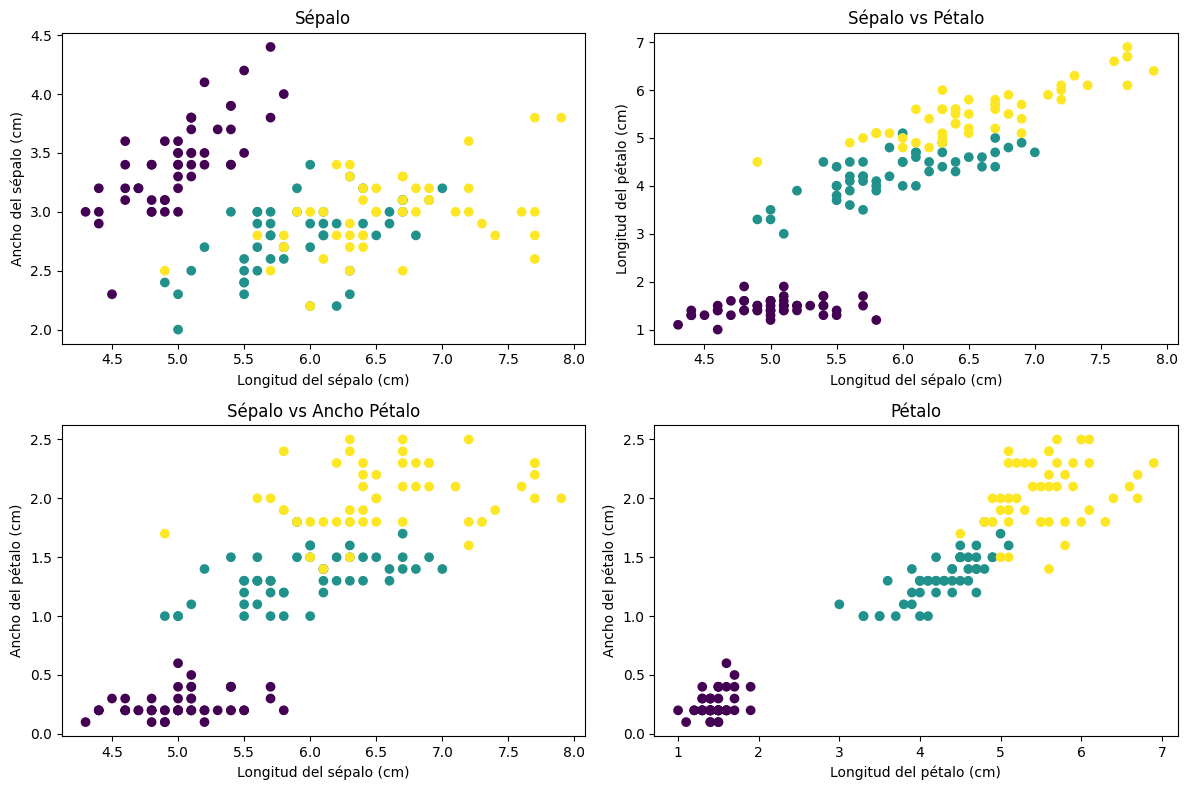

In [13]:
# Gráficos de dispersión para cada par de variables

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.title('Sépalo')
plt.subplot(2, 2, 2)
plt.scatter(iris.data[:, 0], iris.data[:, 2], c=iris.target)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.title('Sépalo vs Pétalo')
plt.subplot(2, 2, 3)
plt.scatter(iris.data[:, 0], iris.data[:, 3], c=iris.target)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.title('Sépalo vs Ancho Pétalo')
plt.subplot(2, 2, 4)
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.title('Pétalo')
plt.tight_layout()
plt.show()

- La longitud y ancho del sépalo parecen tener una relación lineal.
- La longitud del pétalo y ancho del pétalo también tienen una relación lineal.
- Las especies de iris se distribuyen de manera diferente en cada gráfico.

**3. Lo siguiente es entrenar el modelo y determinar los centros de cada cluster,
su inercia y etiqueta.**

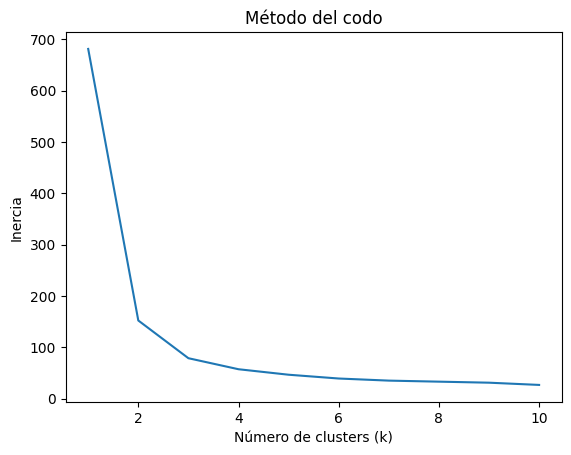

Centros de cada cluster:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]

Inercia del modelo: 78.851441426146

Etiquetas de cada muestra:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [14]:
X = iris.data

# Determinar el número óptimo de clusters (k) mediante el método del codo

inercia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

# Graficar el método del codo para elegir k

plt.plot(range(1, 11), inercia)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

# Elegir k = 3 (ya que sabemos que hay 3 especies de iris)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Centros de cada cluster

centros = kmeans.cluster_centers_
print("Centros de cada cluster:")
print(centros)
print()
# Inercia del modelo

inercia_modelo = kmeans.inertia_
print(f"Inercia del modelo: {inercia_modelo}")
print()
# Etiquetas de cada muestra

etiquetas = kmeans.labels_
print("Etiquetas de cada muestra:")
print(etiquetas)



**4. Debemos, además, graficar los clusters.**

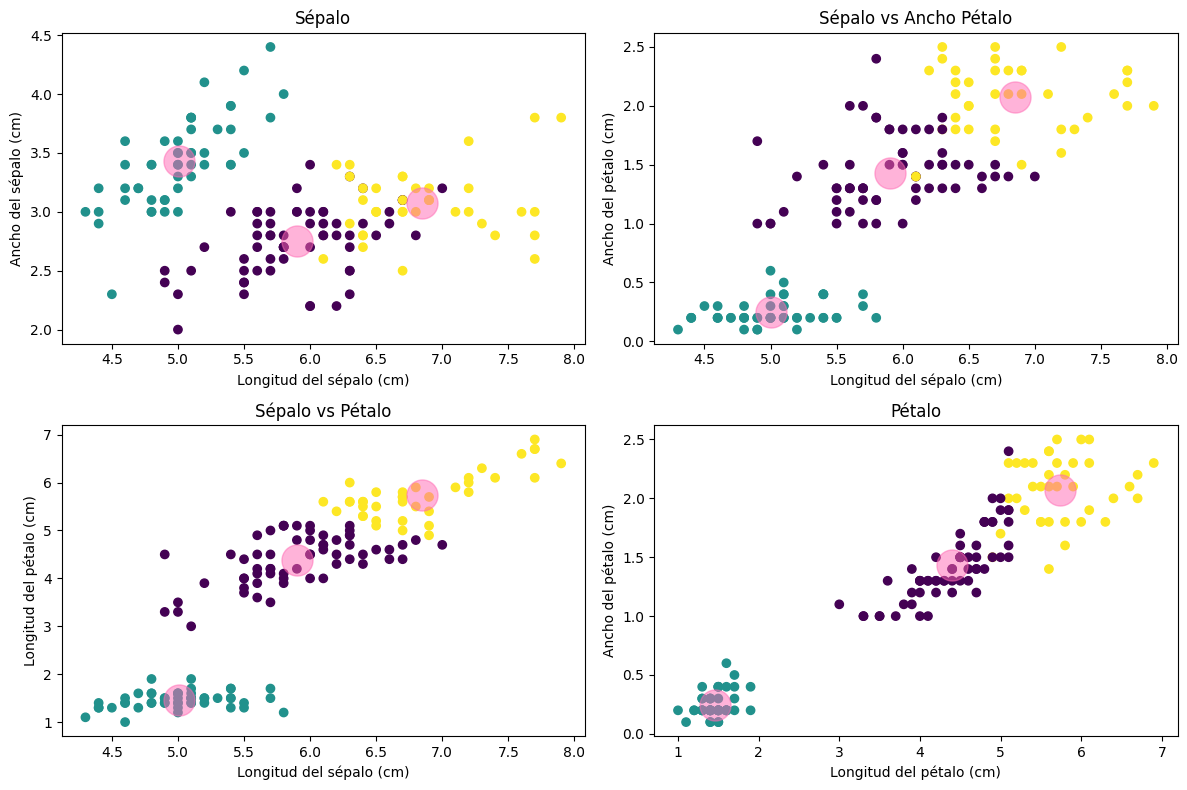

In [15]:
# Gráficos de dispersión para cada par de variables con clusters
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=etiquetas)
plt.scatter(centros[:, 0], centros[:, 1], c='hotpink', s=500, alpha=0.5)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del sépalo (cm)')
plt.title('Sépalo')
plt.subplot(2, 2, 2)
plt.scatter(X[:, 0], X[:, 3], c=etiquetas)
plt.scatter(centros[:, 0], centros[:, 3], c='hotpink', s=500, alpha=0.5)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.title('Sépalo vs Ancho Pétalo')
plt.subplot(2, 2, 3)
plt.scatter(X[:, 0], X[:, 2], c=etiquetas)
plt.scatter(centros[:, 0], centros[:, 2], c='hotpink', s=500, alpha=0.5)
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.title('Sépalo vs Pétalo')
plt.subplot(2, 2, 4)
plt.scatter(X[:, 2], X[:, 3], c=etiquetas)
plt.scatter(centros[:, 2], centros[:, 3], c='hotpink', s=500, alpha=0.5)
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Ancho del pétalo (cm)')
plt.title('Pétalo')
plt.tight_layout()
plt.show()

**5. Por último, mediante el método del codo, determinemos cuál es el número
de clusters ideales para realizar la agrupación.**

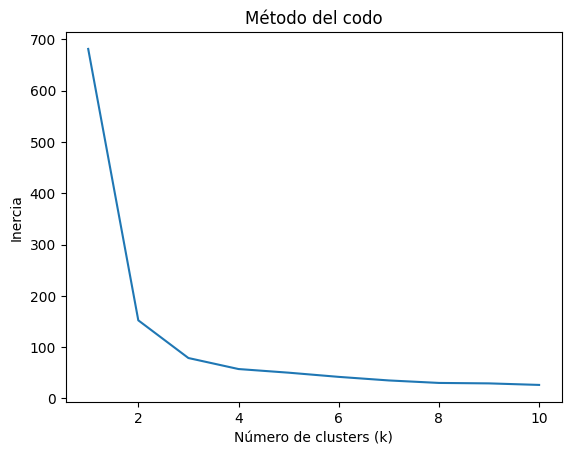

In [22]:
# Método del codo:

inercia = []
for k in range(1, 11):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(X)
 inercia.append(kmeans.inertia_)
plt.plot(range(1, 11), inercia)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

# - El número de clusters ideales para la agrupación es k=3, lo que coincide con el número de especies de iris en el conjunto de datos.


**Entrelazamiento cruzado en K-Means:**

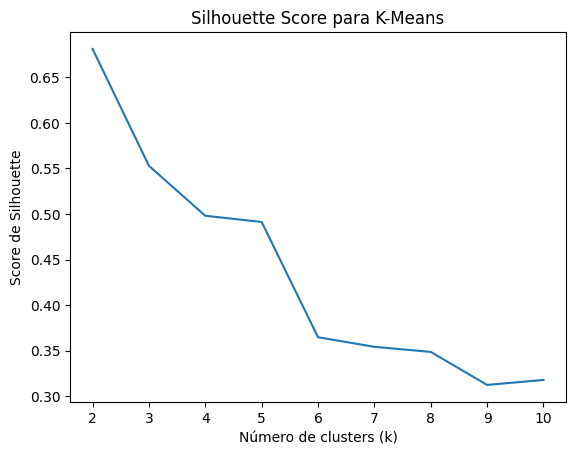

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data

# Definir el rango de valores de k para probar
k_values = range(2, 11)

# Inicializar lista para almacenar los scores de silhouette
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar los scores para elegir el mejor k
plt.plot(k_values, silhouette_scores)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Score de Silhouette')
plt.title('Silhouette Score para K-Means')
plt.show()

In [30]:
# Test de K
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)
score = silhouette_score(X, kmeans.labels_)
silhouette_scores.append(score)

# Score Silhouette

print(f"Silhouette: {score}")
print()

# Inercia del modelo

inercia_modelo = kmeans.inertia_
print(f"Inercia del modelo: {inercia_modelo}")
print()

Silhouette: 0.5528190123564095

Inercia del modelo: 78.851441426146

